# Understanding a neuron

Creating a database

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
ages = np.random.randint(low=15, high=70, size=40)

ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

In [2]:
labels = []
for age in ages:
    if age < 30:
        labels.append(0)
    else:
        labels.append(1)
        
#random swap
for i in range(0, 3):
    r = np.random.randint(0, len(labels) - 1)
    if labels[r] == 0:
        labels[r] = 1
    else:
        labels[r] = 0  
labels [:10]

[1, 1, 0, 0, 1, 0, 0, 1, 1, 1]

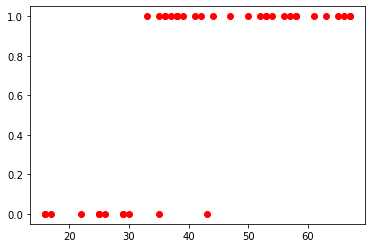

In [3]:
plt.scatter(ages, labels, color="red")
plt.show()

Prediction using linear regression

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1, 1), labels)

LinearRegression()

In [5]:
#y = m.x + b
m = model.coef_[0]
b = model.intercept_

Understanding the coefficients of the line

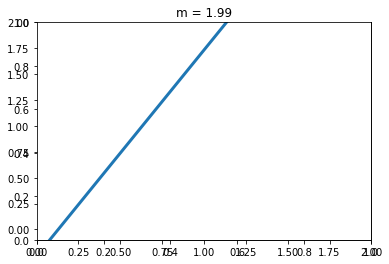

In [6]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# marking the x-axis and y-axis  
axis = plt.axes(xlim =(0, 2),  
                ylim =(-0.1, 2))

# initializing a line variable  
line, = axis.plot([], [], lw = 3)  

# data which the line will  
# contain (x, y)  
def init():  
    line.set_data([], [])  
    return line,  

def animate(i):
    m_copy = i * 0.01
    plt.title('m = ' + str(m_copy))
    x = np.arange(0.0, 10.0, 0.1)
    y = m_copy * x + b
    line.set_data(x, y)  

    return line,

ani = FuncAnimation(fig, animate, init_func = init,  
                    frames = 200,  
                    interval = 20,  
                    blit = True)

ani.save('m.mp4', writer = 'ffmpeg', fps = 30) 

In [7]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="m.mp4" type="video/mp4">
</video></div>""")

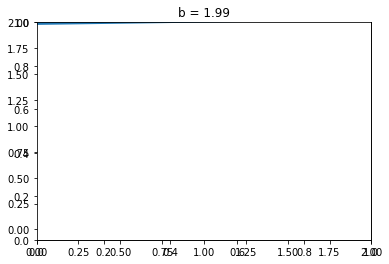

In [8]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# marking the x-axis and y-axis  
axis = plt.axes(xlim =(0, 2),  
                ylim =(-0.1, 2))

# initializing a line variable  
line, = axis.plot([], [], lw = 3)  

# data which the line will  
# contain (x, y)  
def init():  
    line.set_data([], [])  
    return line,  

def animate(i):
    b_copy = i * 0.01
    plt.title('b = ' + str(b_copy))
    x = np.arange(0.0, 10.0, 0.1)
    y = m * x + b_copy
    line.set_data(x, y)  

    return line,

ani = FuncAnimation(fig, animate, init_func = init,  
                    frames = 200,  
                    interval = 20,  
                    blit = True)

ani.save('b.mp4',  
          writer = 'ffmpeg', fps = 30) 

In [9]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="b.mp4" type="video/mp4">
</video></div>""")

Linear regression of that set of dots

33.56240438551759


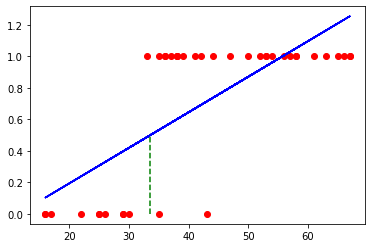

In [10]:
#0.5 = m.x + b
#0.5 - b = m.x
#(0.5 - b) / m = x
limiar_idade = (0.5 - b) / m
print(limiar_idade)

plt.plot(ages, ages * m + b, color = 'blue')
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.scatter(ages, labels, color="red")
plt.show()

Logistic function

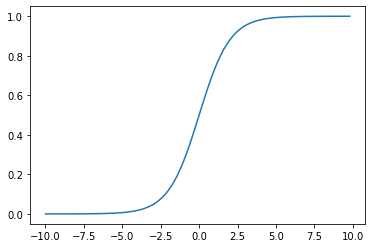

In [11]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

Sigmoid Classifier

33.331480587172706


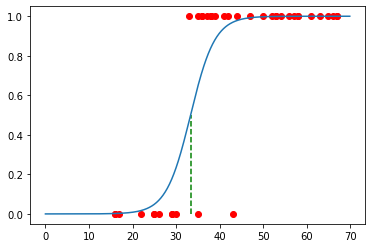

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1, 1), labels)

#y = m.x + b
m = model.coef_[0][0]
b = model.intercept_[0]

x = np.arange(0, 70, 0.1)
sig = sigmoid(m*x + b)

limiar_idade = 0 - (b / m)
print(limiar_idade)

plt.scatter(ages, labels, color="red")
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.plot(x, sig)
plt.show()

# Perceptron

### Digits

In [13]:
from sklearn.datasets import load_digits 
from sklearn.linear_model import Perceptron

Database

In [14]:
X, y = load_digits(return_X_y=True)

print(len(X))

1797


In [15]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Neural network

In [16]:
ppn = Perceptron(random_state=0)

ppn.fit(X, y)

ppn.score(X, y)

0.9393433500278241

Extra

* https://www.youtube.com/playlist?list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO
* https://www.youtube.com/watch?v=aircAruvnKk
* https://www.youtube.com/watch?v=c6NBkkKNZXw&list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So&index=5
* https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
* https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Perceptron.html
* https://chrisalbon.com/machine_learning/basics/perceptron_in_scikit-learn/

### Digits

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd

Database

In [21]:
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

dropped_test = test_data.dropna()

In [22]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [23]:
le = LabelEncoder()
train_data["Sex"] = le.fit_transform(train_data["Sex"])
test_data["Sex"] = le.fit_transform(test_data["Sex"])

In [24]:
enc = OneHotEncoder(handle_unknown='ignore')

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(train_data[['Embarked']]).toarray())
train_data = train_data.iloc[: , :-1]
pd.concat([train_data, one_hot_encond_temp], axis=1, ignore_index=False)

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(test_data[['Embarked']]).toarray())
test_data = test_data.iloc[: , :-1]
pd.concat([test_data, one_hot_encond_temp], axis=1, ignore_index=False)

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0.0,0.0,1.0
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0
415,3,1,38.5,0,0,7.2500,0.0,0.0,1.0
416,3,1,NaN,0,0,8.0500,0.0,0.0,1.0


In [25]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [26]:
XTrain = train_data.iloc[: , 1 : ]
yTrain = train_data.iloc[: , 0]

XTest = test_data

XTrain

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [27]:
sc = StandardScaler()
sc.fit(XTrain)

XTrain = sc.transform(XTrain.values)
XTest = sc.transform(XTest.values)

XTrain

/home/eduardo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/eduardo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.91123237,  0.75905134, -0.53037664,  0.52457013, -0.50589515,
        -0.51897787],
       [-1.47636364, -1.31743394,  0.57183099,  0.52457013, -0.50589515,
         0.69189675],
       [ 0.91123237, -1.31743394, -0.25482473, -0.55170307, -0.50589515,
        -0.50621356],
       ...,
       [-1.47636364, -1.31743394, -0.73704057, -0.55170307, -0.50589515,
        -0.08877362],
       [-1.47636364,  0.75905134, -0.25482473, -0.55170307, -0.50589515,
        -0.08877362],
       [ 0.91123237,  0.75905134,  0.15850313, -0.55170307, -0.50589515,
        -0.50952283]])

Neural network

In [28]:
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0) 
#usa SGD (comentar que atualiza os w para cada amostra e "sorteia" as amostras, permitindo melhor convergência na busca pelo minimo global; fora que permite online learning)
#o batch gd (igual do vídeo passado) é bom para bases pequenas, mas ruim para bases grandes principalmente devido ao estouro de memória, fora que converge mais rápido
#minibatch tem características hibridas

ppn.fit(XTrain, yTrain)

Perceptron(eta0=0.1)

In [29]:
yPred = ppn.predict(XTest)

In [30]:
y_test = pd.read_csv("test_y.csv")
y_test.drop(dropped_test['PassengerId'].index, inplace=True)
y_test = y_test["Survived"].values

In [31]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [32]:
confusion_matrix(y_test, yPred)

array([[151,  72],
       [ 68,  40]])

/home/eduardo/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


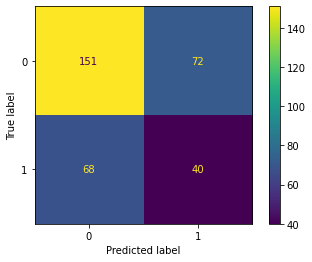

In [33]:
plot_confusion_matrix(ppn, XTest, y_test) 

In [34]:
accuracy_score(y_test, yPred)

0.5770392749244713

In [35]:
ppn.score(XTest, y_test)

0.5770392749244713

Links Extras

* https://www.youtube.com/playlist?list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO
* https://www.youtube.com/watch?v=aircAruvnKk
* https://www.youtube.com/watch?v=c6NBkkKNZXw&list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So&index=5
* https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
* https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Perceptron.html
* https://chrisalbon.com/machine_learning/basics/perceptron_in_scikit-learn/

### Diabetes

In [36]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd

Database

In [37]:
original_data = pd.read_csv("diabetes.csv", sep=',')
data = original_data.iloc[:, 1:]

X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

print(len(X))

767


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [39]:
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

/home/eduardo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/eduardo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
ppn = Perceptron(max_iter=1000, eta0=0.15)
ppn.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.15)

In [41]:
y_pred = ppn.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[73,  3],
       [32,  8]])

/home/eduardo/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


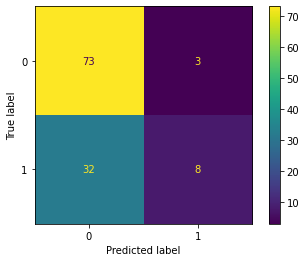

In [43]:
plot_confusion_matrix(ppn, X_test, y_test)

In [44]:
accuracy_score(y_test, y_pred)

0.6982758620689655

Perceptron multilayer

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
import random as python_random

SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [48]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2022-05-05 21:44:44.274616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-05 21:44:44.274694: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-05 21:44:44.274734: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eduardo): /proc/driver/nvidia/version does not exist
2022-05-05 21:44:44.276250: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
ann.fit(X_train, y_train, batch_size=16, epochs=2000)

Epoch 1/2000
41/41 [==============================] - 1s 3ms/step - loss: 11.8776 - accuracy: 0.3533
Epoch 2/2000
41/41 [==============================] - 0s 3ms/step - loss: 3.2274 - accuracy: 0.4777
Epoch 3/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.6649 - accuracy: 0.6068
Epoch 4/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.4826 - accuracy: 0.6252
Epoch 5/2000
41/41 [==============================] - 0s 2ms/step - loss: 1.3840 - accuracy: 0.6283
Epoch 6/2000
41/41 [==============================] - 0s 3ms/step - loss: 1.3032 - accuracy: 0.6298
Epoch 7/2000
41/41 [==============================] - 0s 3ms/step - loss: 1.2226 - accuracy: 0.6452
Epoch 8/2000
41/41 [==============================] - 0s 3ms/step - loss: 1.1444 - accuracy: 0.6375
Epoch 9/2000
41/41 [==============================] - 0s 3ms/step - loss: 1.0835 - accuracy: 0.6467
Epoch 10/2000
41/41 [==============================] - 0s 3ms/step - loss: 1.0319 - accuracy: 0.643

In [50]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [51]:
confusion_matrix(y_test, y_pred)

array([[61, 15],
       [19, 21]])

In [52]:
accuracy_score(y_test, y_pred)

0.7068965517241379

### Cardio

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_csv("cardio.csv", sep=';')
data = original_data.iloc[:, 1:]

X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

print(len(X))

70000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

/home/eduardo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/eduardo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.1)

In [6]:
y_pred = ppn.predict(X_test)

In [7]:
confusion_matrix(y_test, y_pred)

array([[2616, 2569],
       [ 955, 4360]])

/home/eduardo/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


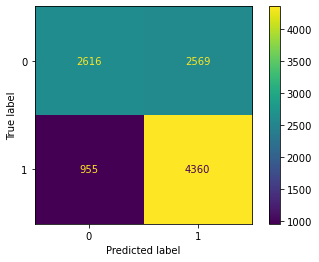

In [8]:
plot_confusion_matrix(ppn, X_test, y_test) 

In [9]:
accuracy_score(y_test, y_pred)

0.6643809523809524

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-05-05 22:04:28.665206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-05 22:04:28.665255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [11]:
import random as python_random

SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [13]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = ann.fit(X_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
465/465 [==============================] - 2s 4ms/step - loss: 46.3245 - accuracy: 0.5012
Epoch 2/100
465/465 [==============================] - 2s 4ms/step - loss: 0.7495 - accuracy: 0.5033
Epoch 3/100
465/465 [==============================] - 2s 3ms/step - loss: 0.7534 - accuracy: 0.5022
Epoch 4/100
465/465 [==============================] - 2s 5ms/step - loss: 0.7544 - accuracy: 0.5070
Epoch 5/100
465/465 [==============================] - 2s 4ms/step - loss: 0.7563 - accuracy: 0.5080
Epoch 6/100
465/465 [==============================] - 2s 4ms/step - loss: 0.7428 - accuracy: 0.5035
Epoch 7/100
465/465 [==============================] - 1s 3ms/step - loss: 0.7494 - accuracy: 0.5078
Epoch 8/100
465/465 [==============================] - 2s 3ms/step - loss: 0.7405 - accuracy: 0.5099
Epoch 9/100
465/465 [==============================] - 1s 3ms/step - loss: 0.7393 - accuracy: 0.5110
Epoch 10/100
465/465 [==============================] - 1s 3ms/step - loss: 0.7311 - accur

In [15]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [16]:
confusion_matrix(y_test, y_pred)

array([[4582,  603],
       [2828, 2487]])

In [17]:
accuracy_score(y_test, y_pred)

0.6732380952380952